<a href="https://colab.research.google.com/github/MehdiMatinfar/Dental_Xray/blob/main/dental_xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import cv2
import random
import  PIL.Image
from mpl_toolkits.axes_grid1 import ImageGrid

In [ ]:
dental_files = []
for dirname, _, filenames in os.walk('/content/input'):
    for filename in filenames:
        dental_files.append((os.path.join(dirname, filename)))
print(dental_files)

['/content/input/Dental_Xray3.tfrec']


In [ ]:
def get_rawdata_from_records(dental_files):
    raw_dataset = tf.data.TFRecordDataset(dental_files)
    for raw_record in raw_dataset.take(1):
      example = tf.train.Example()
      example.ParseFromString(raw_record.numpy())
      print(example)

In [ ]:
def decode_fn(record_bytes):
  return tf.io.parse_single_example(
      # Data
      record_bytes,

      # Schema
      {"height": tf.io.FixedLenFeature([], dtype=tf.int64),
       "width": tf.io.FixedLenFeature([], dtype=tf.int64),
       "image_raw":  tf.io.FixedLenFeature([], dtype=tf.string)}
  )

In [ ]:
df_list= []
for batch in tf.data.TFRecordDataset([dental_files]).map(decode_fn):
    row_list = []
    row_list.append(tf.keras.backend.get_value(batch['height']))
    row_list.append(tf.keras.backend.get_value(batch['width']))
    row_list.append(tf.keras.backend.get_value(batch['image_raw']))
    df_list.append(row_list)

In [ ]:
print(len(df_list))
df = pd.DataFrame(df_list, columns=['height','width','image_raw'])

116


In [ ]:
df.head()


,height,width,image_raw
0,256,256,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
1,256,256,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
2,256,256,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
3,256,256,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
4,256,256,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...


In [ ]:
def display_images(df, img_count):
    fig = plt.figure(1, (20, 15))
    row = int(img_count/5.0)
    if row == 0: row =1
    grid = ImageGrid(fig, 111, nrows_ncols=(row, img_count), axes_pad=0.1)
    totsamples = df.shape[0]
    if (img_count < totsamples):
        randomlist = random.sample(range(0, df.shape[0]), img_count)
        nb_cols = 5
        nb_rows = 5
        i = 0
        for r in randomlist:
            filename = str(r) +".png"
            f = open(filename, "wb")
            f.write(df['image_raw'].iloc[r])
            f.close()
            ax = grid[i]
            #decode the array into an image
            img = cv2.imread(filename)
#             img = cv2.resize(img, (df['height'].iloc[r], df['width'].iloc[r]))
            img = cv2.resize(img, (150, 150))
            ax.axis("off")
            ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            i=i+1

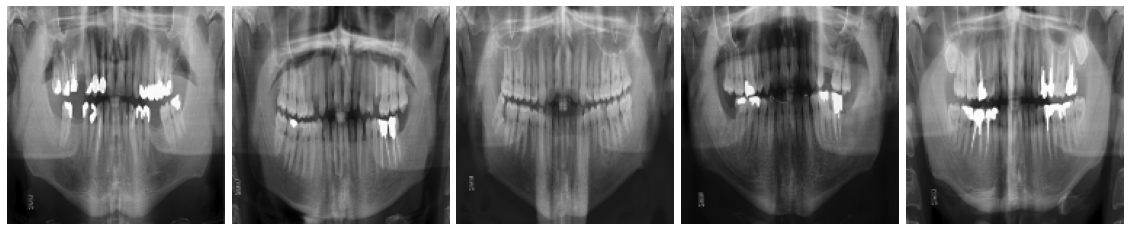

In [ ]:
display_images(df,5)
